# Algorithm Explains

## Method
1. We implement a Double-DQN algorithm which selects action and evaluate action using seperate networks. More details can be seen in model.py file.
2. The network architecture is a 4 layers fully-connected network along with the ReLU activation function, the number of output units are 256, 128, 32, 4 respectively.
3. Hyperparameters. The code is similar to the DQN excersise, except for the hyperparameter TAU, we set it from 1e-3 to 5e-3 for updating the target network much faster, because this Pick-Banana task need less episodes to convergence (up to 2000).


## Plot of average rewards.
![reward_curve](img/reward_curve.png)
Here is the average score curve, the x-axis is the number of episodes (muliplied by 100), the y-axis is the average reward. The figure illustrates that only 750 episodes needed to solve the environment (able to receive an average reward (over 100 episodes) of at least +13).

## Future Work
To further promote the performance, We can implement Duleling network with two stream, one is the value function estimator and the other one is the advantage function estimator. Note that there is a trick to implement the Q function.
![dueling_network_trick](img/dueling_network_trick.png)

# The following code use the pretrained weights to perform Double-DQN algorithm.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from model import *
from collections import deque
from tqdm import tqdm

In [2]:
# please do not modify the line below
env = UnityEnvironment(file_name="./Banana", no_graphics=True)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
num_episodes = 100
scores_window = deque(maxlen=100)
avg_scores = []
best_scores = 3
agent = Agent(state_size=37, action_size=4, seed=2020, pre_trained=True)  # Load Pretrained Model
with tqdm(total=num_episodes) as pbar:
    for i_episode in range(num_episodes):
        pbar.update(1)
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        while True:
            action = agent.act(state, eps=0)       # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
#             agent.step(state, action, reward, next_state, done) # using agent interact with the environment
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)
        if i_episode % 100 == 0:
            avg_scores.append(np.mean(scores_window))
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
env.close()

  0%|          | 0/100 [00:00<?, ?it/s]

Load model successful


  2%|▏         | 2/100 [00:02<01:53,  1.16s/it]

Episode 0	Average Score: 17.00


100%|██████████| 100/100 [03:30<00:00,  2.10s/it]


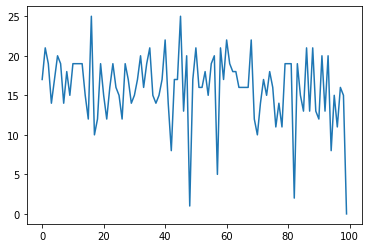

In [4]:
import matplotlib.pyplot as plt
plt.plot(scores_window)
plt.show()

In [5]:
np.mean(scores_window)

15.94